# Classification of Creditworthiness

**Author: Magali Solimano**

## Overview

A German bank has been struggling to correctly identify creditworthy borrowers. As a result, it is foregoing business opportunities to extend credit to good borrowers. It is also experiencing increasing credit losses from non-performing loans made to uncrediworthy borrowers.

Goal: The bank has commissioned the development of a machine learning model that is trained to assess and predict the credit risk of borrowers (ie, identify which borrowers are creditworthy and which borrowers are not creditworthy.)

## Business Understanding

Desired outcomes include identifying true positives (creditworthy classifications) and reducing false positives (which would result in losses for the bank) and false negatives (which would mean that the bank misses out on lending to a good borrower).

In this analysis, creditworthy borrowers are classified as '1' and not creditworthy borrowers are classified as '0'.

## Data

__Variable Descriptions__

- **classification**: bad credit (0), good credit (1) 

- **account_balance**: no account (1), no balance (2), some balance (3) 

- **duration**: number of months from the date of loan drawdown until date when loan is paid in full

- **credit_history**: no credit history (0), all credits paid back duly (1), delays in paying off debts in the past (2), other existing credits not at this bank (3)

- **purpose**: new car (0), used car (1), furniture (2), radio/TV (3), appliances (4), repairs (5), education (6), vacation (7), retraining (8), business (9), other (10)

- **amount**: initial amount of credit extended

- **savings_account** (in local currency): none (0), below 100 (1), 100-500 (2), 500-1000 (3), above 1000 (4)

- **time_current_employment**: unemployed (1), less than 1 year (2), 1-4 years (3), 4-7 years (4), more than 7 years (5)

- **installment_pct**: installment rate as percentage of disposable income: above 35% (1), 25-35% (2), 20-25% (3), Below 20% (4)

- **sex_marital_status**: male divorced (1), male single (2), male married/widowed (3), female (4)

- **sex**: female (0), male (1)

- **guarantor**: none (1), co-applicant (2), guarantor (3)

- **time_current_address**: less than one year (1), 1-4 years (2), 4-7 years (3), more than 7 years (4)

- **most_valuable_asset**: none (1), car (2), life insurance (3), real estate (4)

- **age**: age of borrower in years

- **other_credit_sources**: other banks (1), store (2), none (3)

- **housing**: free (0), rented (1), owned (2)

- **number_credits**: one (1), more than one (2) at this bank

- **occupation**: unemployed/unskilled non-resident (1), unemployed/unskilled permanent resident (2), skilled employee (3), highly qualified/self-employed/executive (4)

- **number_dependents**: three or more (1), less than three (2)

- **telephone**: no (0), yes (1)

- **foreign_worker**: no (0), yes (1)

- **sex**: female (0), male (1)


### Loading data and relevant libraries

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Data visualization
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import StrMethodFormatter

# Model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from imblearn.ensemble import RUSBoostClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, auc, average_precision_score, 
                             confusion_matrix, plot_confusion_matrix, 
                             ConfusionMatrixDisplay, classification_report,
                             precision_recall_curve)
from sklearn.linear_model import LogisticRegression
import six
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.model_selection import GridSearchCV


# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Load dataset and preview first five columns
data = pd.read_csv('data/german_credit.csv')
data.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


### Data Understanding

In [8]:
# Rename columns
# Create list of new column names
column_names = ['classification', 'account_balance', 'duration', 
           'credit_history', 'purpose', 'amount', 
           'savings_account', 'time_current_employment', 
           'installment_pct', 'sex_marital_status', 'guarantors',
           'time_current_address','most_valuable_asset', 'age', 
           'other_credits', 'housing', 'number_credits', 
           'occupation', 'number_dependents', 'telephone', 'foreign_worker']

# Rename all columns with list
data.columns = column_names

print(data.columns)

Index(['classification', 'account_balance', 'duration', 'credit_history',
       'purpose', 'amount', 'savings_account', 'time_current_employment',
       'installment_pct', 'sex_marital_status', 'guarantors',
       'time_current_address', 'most_valuable_asset', 'age', 'other_credits',
       'housing', 'number_credits', 'occupation', 'number_dependents',
       'telephone', 'foreign_worker'],
      dtype='object')


In [9]:
# Examine information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   classification           1000 non-null   int64
 1   account_balance          1000 non-null   int64
 2   duration                 1000 non-null   int64
 3   credit_history           1000 non-null   int64
 4   purpose                  1000 non-null   int64
 5   amount                   1000 non-null   int64
 6   savings_account          1000 non-null   int64
 7   time_current_employment  1000 non-null   int64
 8   installment_pct          1000 non-null   int64
 9   sex_marital_status       1000 non-null   int64
 10  guarantors               1000 non-null   int64
 11  time_current_address     1000 non-null   int64
 12  most_valuable_asset      1000 non-null   int64
 13  age                      1000 non-null   int64
 14  other_credits            1000 non-null   int64
 15  housi

- Dataset has one target variable (classification) and twenty independent variables.
- All data types are integers. Many will require changing dtypes.
- Seven variables are numerical: three variables are continuous numerical and four are binary.  
Fourteeen independent variables should be categorical and can be one hot encoded:
    - account_balance, credit_history, purpose, savings_account, 
    time_current_employment, installment_pct, guarantors, time_current_address,
    most_valuable_asset, concurrent_credits, housing, number_credits, occupation, number_dependents.
- No missing values.

In [10]:
# Examine summary statistics
data.describe()

,classification,account_balance,duration,credit_history,purpose,amount,savings_account,time_current_employment,installment_pct,sex_marital_status,...,time_current_address,most_valuable_asset,age,other_credits,housing,number_credits,occupation,number_dependents,telephone,foreign_worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


- Variables have different scales. Continuous numerical variables (duration,amount, age) have  
larger scales than the other categorical variables.
- amount has wide distribution, with large max.

###  Exploratory Data Analysis and Data Preparation

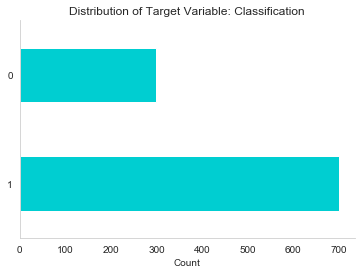

In [11]:
# Inspect class balance
data['classification'].value_counts().plot(kind='barh', color = 'darkturquoise', grid=False,
                                    title = 'Distribution of Target Variable: Classification')
plt.xlabel('Count')

# Remove grid line
plt.grid(False)

# Remove top border and right border
sns.despine()

plt.show()

- The target variable "classification" is binary, with '0' representing a bad credit and '1' representing  
a good credit.  
- The target variable has class imbalance. Seventy percent of observations are classified as  
good credit, and thirty percent are classified as bad credit.

**Data Types**

In [12]:
# Change relevant column dtypes to object
# Create dtype dictionary to convert relevant columns to str/object
dtype_dict = {
              'account_balance': str,
              'credit_history': str,
              'purpose': str,
              'savings_account': str,
              'time_current_employment': str,
              'installment_pct': str,
              'guarantors': str,
              'time_current_address': str,
              'most_valuable_asset': str,
              'other_credits': str,
              'housing': str,
              'number_credits': str,
              'occupation': str,
              'number_dependents': str,
            }

# Cast relevant columns to str using dictionary
data = data.astype(dtype_dict)

In [13]:
# Check updated datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   classification           1000 non-null   int64 
 1   account_balance          1000 non-null   object
 2   duration                 1000 non-null   int64 
 3   credit_history           1000 non-null   object
 4   purpose                  1000 non-null   object
 5   amount                   1000 non-null   int64 
 6   savings_account          1000 non-null   object
 7   time_current_employment  1000 non-null   object
 8   installment_pct          1000 non-null   object
 9   sex_marital_status       1000 non-null   int64 
 10  guarantors               1000 non-null   object
 11  time_current_address     1000 non-null   object
 12  most_valuable_asset      1000 non-null   object
 13  age                      1000 non-null   int64 
 14  other_credits            1000 non-null   

**Categorical Variable Labels**

In [14]:
data.sex_marital_status.value_counts()

3    548
2    310
4     92
1     50
Name: sex_marital_status, dtype: int64

In [15]:
# Create new variable 'sex' with data from sex_marital_status and 
# combine various male labels (1, 2, 3).
data['sex'] = data.sex_marital_status.replace({2:1, 3:1, 4:0})
data.sex.value_counts()

# Apply label encoding for binary classification
label_enc = LabelEncoder()
data['sex'] = label_enc.fit_transform(data['sex'].astype(str))

print(data['sex'].value_counts())

# Drop sex_marital_status column, which has marital status for males 
# but not for females.
data.drop(['sex_marital_status'], axis=1, inplace=True)

1    908
0     92
Name: sex, dtype: int64


In [16]:
# Apply binary label encoding to telephone and foreign_worker variables. 
# Labels 1,2 should be encoded as 0,1 consistent with binary classifications
# where 0 represents the negative case and 1 represents the positive case.
data['telephone'] = label_enc.fit_transform(data['telephone'].astype(str))
data['foreign_worker'] = label_enc.fit_transform(data['foreign_worker'].astype(str))

print(data.telephone.value_counts())
print(data.foreign_worker.value_counts())

0    596
1    404
Name: telephone, dtype: int64
0    963
1     37
Name: foreign_worker, dtype: int64


In [17]:
# account_balance variable: combine labels 3, 4 to account for "some balance"
data.account_balance.replace({'4':'3'}, inplace =True)
data.account_balance.value_counts()

3    457
1    274
2    269
Name: account_balance, dtype: int64

In [18]:
# credit_history variable: combine labels 1,2 to account for "all credits paid back duly"
data.credit_history.replace({'2':'1'},  #assign label 2 to 1 'all credits paid back duly
                             inplace = True)

# Apply label encoding to update labels
data.credit_history = label_enc.fit_transform(data['credit_history']).astype(str)

data.credit_history.value_counts(normalize=True)

1    0.579
3    0.293
2    0.088
0    0.040
Name: credit_history, dtype: float64

In [19]:
# number_credits: combine labels 2,3,4 to account for "more than one" credit at bank
data.number_credits.replace({'3':'2', '4':'2'},inplace = True)
data.number_credits.value_counts()

1    633
2    367
Name: number_credits, dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   classification           1000 non-null   int64 
 1   account_balance          1000 non-null   object
 2   duration                 1000 non-null   int64 
 3   credit_history           1000 non-null   object
 4   purpose                  1000 non-null   object
 5   amount                   1000 non-null   int64 
 6   savings_account          1000 non-null   object
 7   time_current_employment  1000 non-null   object
 8   installment_pct          1000 non-null   object
 9   guarantors               1000 non-null   object
 10  time_current_address     1000 non-null   object
 11  most_valuable_asset      1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_credits            1000 non-null   object
 14  housing                  1000 non-null   

**Exploratory Data Analysis**

In [21]:
# Select numerical variables
num_cols = data.select_dtypes('int64')

# Select categorical variables
cat_cols = data.select_dtypes('object')

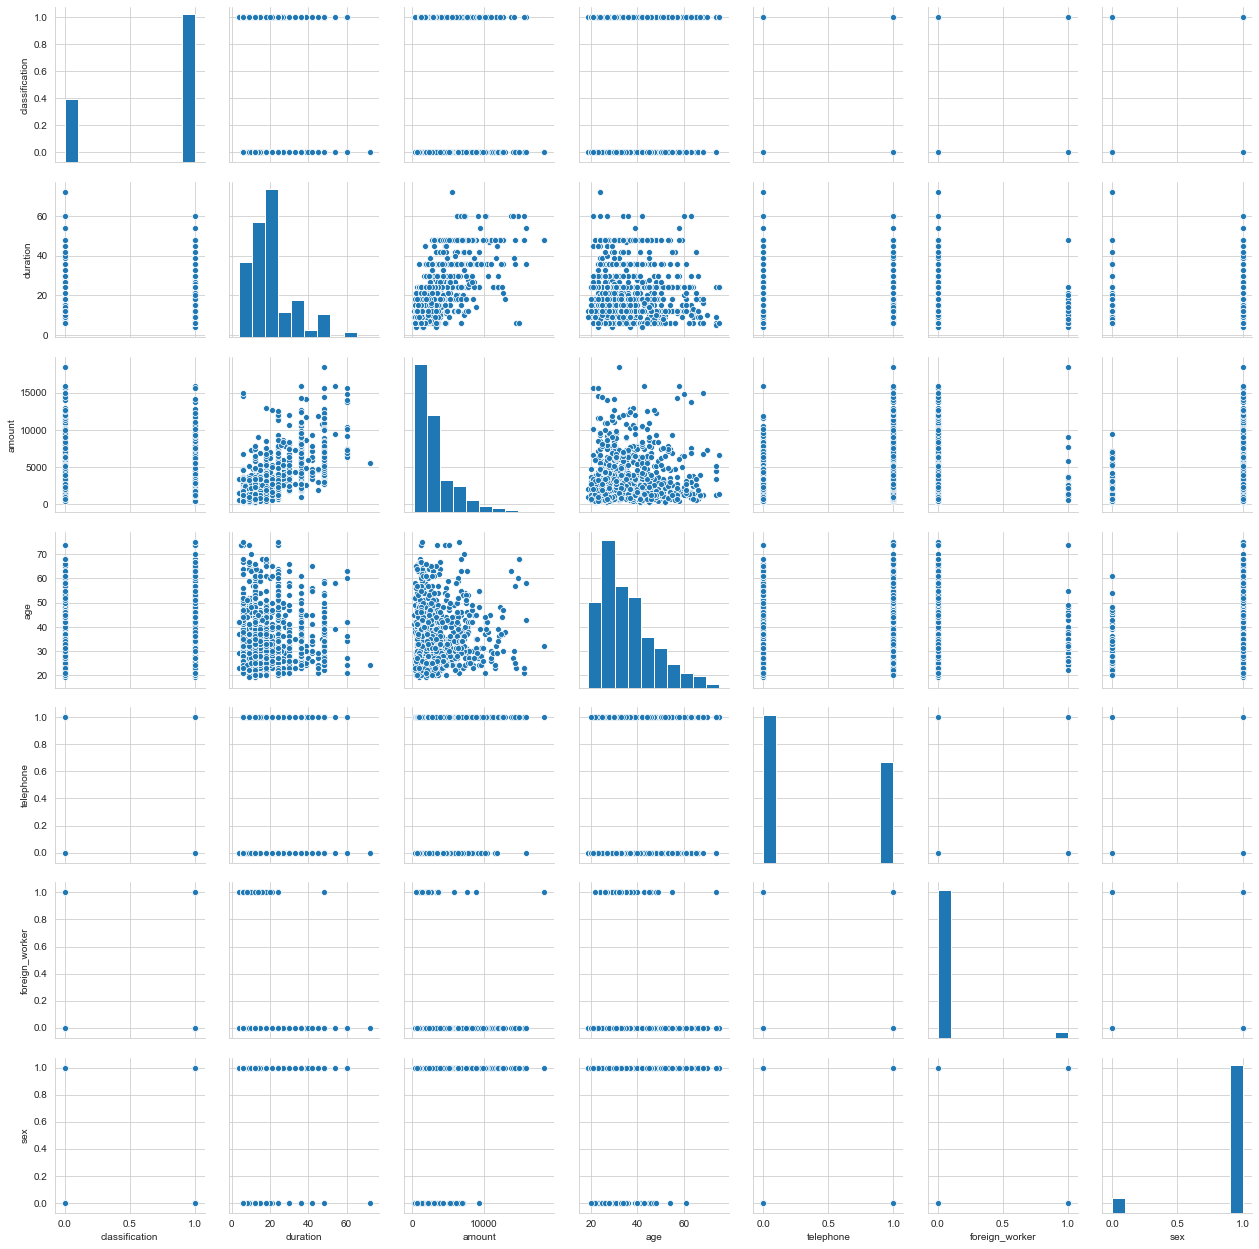

In [22]:
# Examine variable relationships: plot pairplots
sns.pairplot(num_cols)

In [23]:
# Examine variable relationships: Correlation matrix
data.corr()

,classification,duration,amount,age,telephone,foreign_worker,sex
classification,1.000000,-0.214927,-0.154740,0.091272,0.036466,0.082079,-0.019630
duration,-0.214927,1.000000,0.624988,-0.037550,0.164718,-0.134680,0.084418
amount,-0.154740,0.624988,1.000000,0.032273,0.277000,-0.030662,0.138287
age,0.091272,-0.037550,0.032273,1.000000,0.143506,0.013981,0.145709
telephone,0.036466,0.164718,0.277000,0.143506,1.000000,-0.075012,0.029388
foreign_worker,0.082079,-0.134680,-0.030662,0.013981,-0.075012,1.000000,-0.029254
sex,-0.019630,0.084418,0.138287,0.145709,0.029388,-0.029254,1.000000


- Numerical variables appear to capture different features. No overlap among features.
- Duration of credit and amount of credit have somewhat linear relationship, with correlation  
of 62%. Both features also have an inverse relationship with target variable.

**Outlier Analysis**

In [24]:
num_cols.columns

Index(['classification', 'duration', 'amount', 'age', 'telephone',
       'foreign_worker', 'sex'],
      dtype='object')

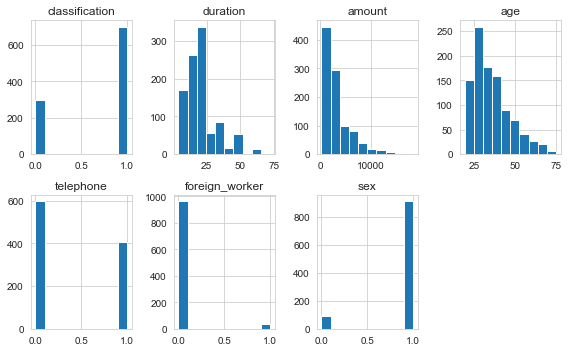

In [25]:
# Create histograms for numerical variables
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (8,5))
fig.set_tight_layout(True)

for index, col in enumerate(num_cols.columns):
    ax=axes[index//4][index%4]
    ax.hist(data[col])

    # Set column name as title
    ax.set_title(col)
    
# Remove empty subplot from figure   
fig.delaxes(axes[1][3])    

- age, amount, and duration variables are positively skewed.

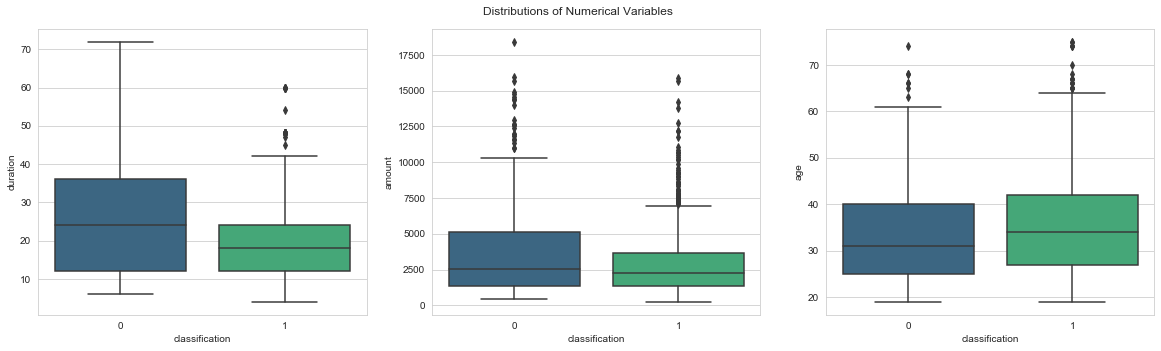

In [26]:
# Plot boxplots of continous numerical variables
cont_num_cols = num_cols[['duration', 'amount', 'age']]

fig, axes = plt.subplots(nrows = 1, ncols = 3)
axes = axes.flatten()        
fig.set_size_inches(20, 5)
plt.suptitle('Distributions of Numerical Variables')
plt.subplots_adjust(top=0.92) 

for ax, col in zip(axes, cont_num_cols.columns):
    sns.boxplot(x=data['classification'], y=cont_num_cols[col], ax = ax,  
                notch= False, palette = 'viridis')

- Classification label '1' credits have lower average duration, slightly lower  
average credit amounts, and higher average age of borrowers.

**Additional Data Analysis**

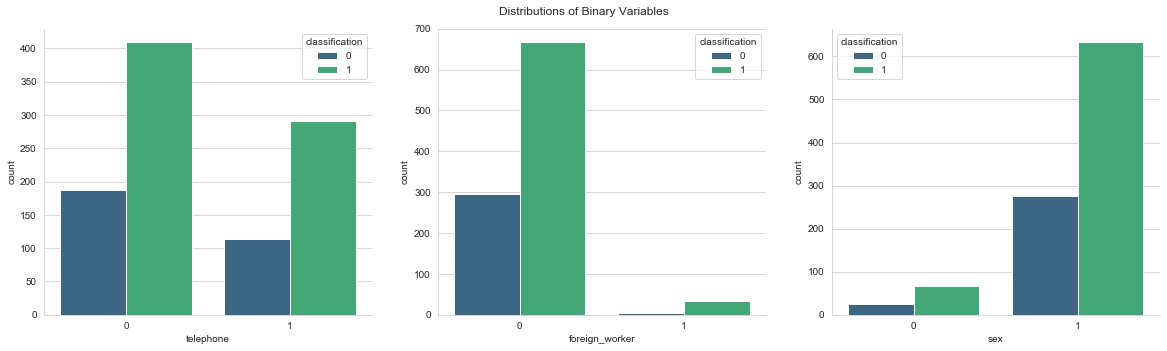

In [27]:
fig, axes = plt.subplots(nrows = 1, ncols = 3)
axes = axes.flatten()   
fig.set_size_inches(20, 5)
plt.suptitle('Distributions of Binary Variables')
plt.subplots_adjust(top=0.92) 

binary_num_cols = num_cols[['telephone', 'foreign_worker', 'sex']]

for ax, col in zip(axes, binary_num_cols.columns):
    sns.countplot(x=binary_num_cols[col], ax = ax,  data=data, hue='classification', palette='viridis')
    sns.despine()

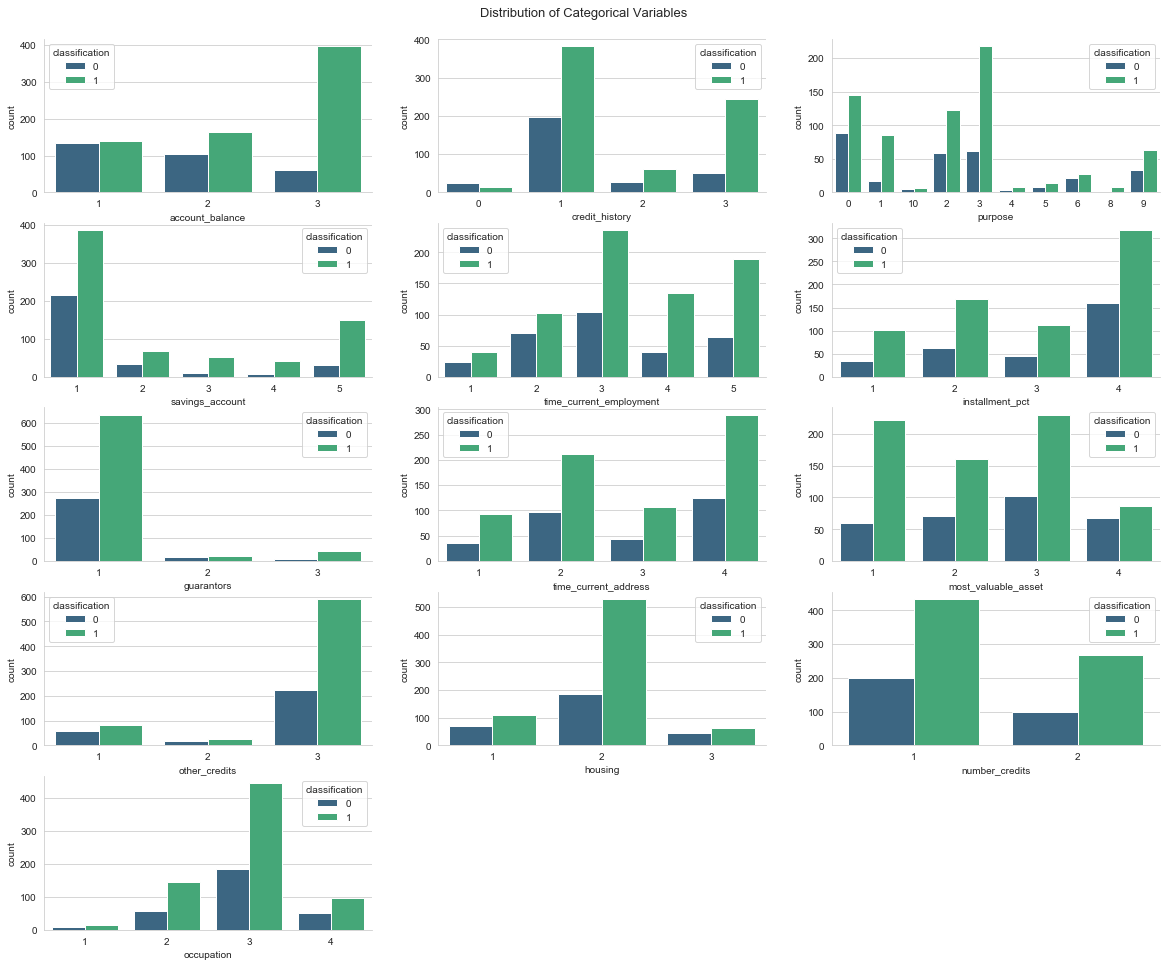

In [28]:
# Plotting distributions of categorical variables

fig, axes = plt.subplots(nrows = 5, ncols = 3)   
axes = axes.flatten()        
fig.set_size_inches(20, 15)
plt.suptitle('Distribution of Categorical Variables', size = 13)
plt.subplots_adjust(top=0.95)

for ax, col in zip(axes, cat_cols.columns):
    sns.countplot(x=data[col], ax = ax,  data=data, hue='classification', 
                  palette='viridis')
    axes.flat[-1].set_visible(False) # to remove empty subplot
    axes.flat[-2].set_visible(False) # to remove empty subplot
    
    sns.despine()

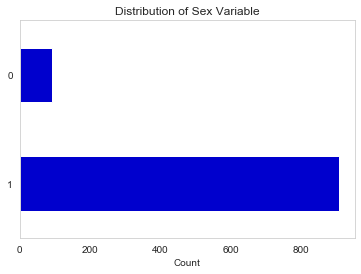

In [29]:
# Distribution of sex variable
data['sex'].value_counts().plot(kind='barh', color = 'mediumblue', grid=False,
                                    title = 'Distribution of Sex Variable')
plt.xlabel('Count')
plt.show()

There are more males than females the the dataset, which may bias results since  
model would be trained on more male data.

In [30]:
# Percent of males and females that are good credits (as share of total male
# applicants and total female applicants, respectively)
np.round(
    (data.groupby('sex')['classification'].sum() 
     / data['sex'].value_counts())*100)

0    73.0
1    70.0
dtype: float64

In [31]:
# Percent of males and females that are good credits (as share of total male
# applicants and total female applicants, respectively) and 
# mean credit amount applied for by sex
data.groupby('sex')['classification','amount'].mean()

,classification,amount
sex,,
0,0.728261,2045.543478
1,0.697137,3395.438326


In [32]:
# Profile of creditworthy vs non-creditworthy borrower
# If creditworthy, what is breakdown of mean credit amount, mean duration, mean age
data.groupby('classification')['sex','amount', 'duration', 
                                                 'age'].mean()

,sex,amount,duration,age
classification,,,,
0,0.916667,3938.126667,24.860000,33.96
1,0.904286,2985.442857,19.207143,36.22


In [33]:
# If creditworthy, what is breakdown of sex, mean credit amount, mean duration, mean age
data.loc[data['classification']==1].groupby('sex')['classification',
                                                 'amount', 'duration', 
                                                 'age'].mean()

,classification,amount,duration,age
sex,,,,
0,1.0,1898.492537,16.134328,30.507463
1,1.0,3100.491311,19.532385,36.824645


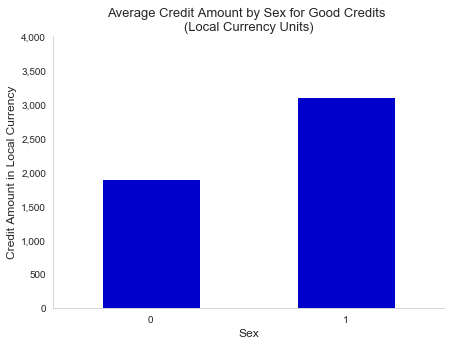

In [34]:
# Plot mean credit amount by sex, if creditworthy 
# Create df of filtered data
chart_df = data.loc[data['classification']==1].groupby('sex')['classification',
                                                        'amount', 'duration', 
                                                        'age'].mean()

# Create figure and set size
fig, ax = plt.subplots(figsize=(7,5))

# Plot bar chart
chart_df['amount'].plot(kind='bar', color='mediumblue')

# Format x-ticks rotation
plt.xticks(rotation=0)

# Set x-label and y-label
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Credit Amount in Local Currency', fontsize=12)

# Format y-axis min, max range. Add commas and remove decimals
ax.set_ylim([0, 4000])
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Remove grid line
plt.grid(False)

# Remove top border and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set title
plt.title('Average Credit Amount by Sex for Good Credits \n(Local Currency Units)',
         fontsize=13)

plt.show;

Among class 1 (good credits), males have a higher average amount of credit approved  
compared to females.

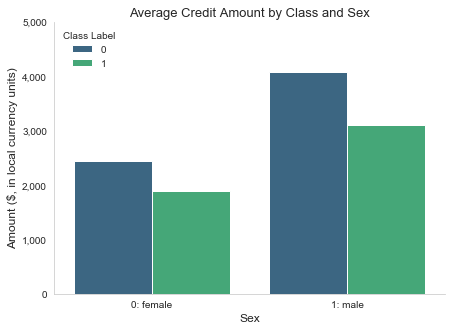

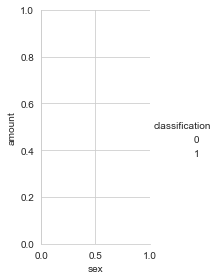

In [35]:
# Plot amount of credit by sex

# Create figure and set size
fig, ax = plt.subplots(figsize=(7,5))

sns.catplot(x='sex', y = 'amount', hue= 'classification',
                data=data, kind='bar', ci= None, height = 4, aspect=.6, 
                palette='viridis', ax=ax)

# Format y-axis min, max range. Add commas and remove decimals
ax.set_ylim([0, 5000])
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
# Format y-label
ax.set_ylabel('Amount ($, in local currency units)', fontsize=12)

# x-tick labels
xticklabels = ('0: female', '1: male')
ax.set_xticklabels(xticklabels)
# Format x-label
ax.set_xlabel('Sex', fontsize=12)

# Remove grid lines
ax.grid(False)

# Remove borders
sns.despine(ax=ax)

# Format legend
ax.legend(loc='upper left', frameon=False, title = 'Class Label')

# Add title and adjust title position
ax.set_title(
    'Average Credit Amount by Class and Sex', fontsize=13)

plt.show;

Both males and females in class 0 (bad credits) seek higher amounts of credit  
than males and females in class 1 (good credits).  

Among class 1 (good credits), males have a higher average credit amount  
approved compared to females. 

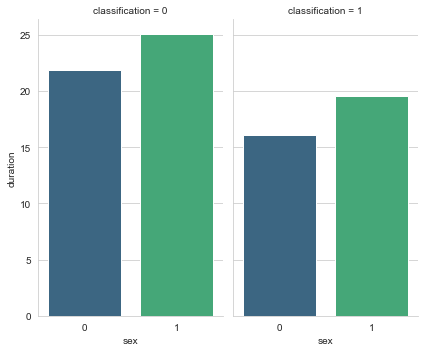

In [36]:
# Plot duration of credit by sex
sns.catplot(x='sex', y = 'duration', col= 'classification',
                data=data, kind="bar", ci=None, aspect=.6, palette='viridis')

Both males and females in class 0 (bad credits) seek longer duration of credit than males and females  
in class 1 (good credits).

Among class 1 (good credits), males have a higher credit duration
approved compared to females.

- Among class 1 credits , males are older on average compared to females. Males with class 1 label are older on average than males with class 0 labels, while females in both class 1 and 0 are around the same age on average. 

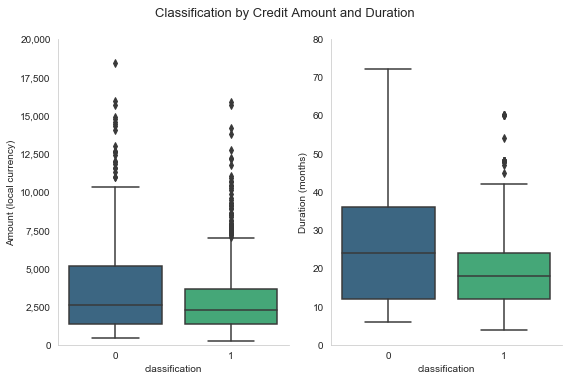

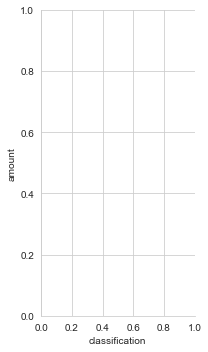

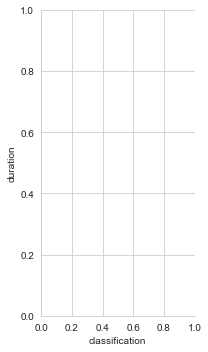

In [37]:
# Plot classification by amount, duration, age
# Create figure and set size
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize= (8,5))

# Plot amount
sns.catplot(x='classification', y = 'amount',
                data=data, kind="box", ci=None, aspect=.6, palette='viridis',
           ax=axes[0])

# Set y-axis ticks range and label
axes[0].set_ylim([0, 20000])
axes[0].yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Format y-label
axes[0].set(ylabel = 'Amount (local currency)')

#Plot duration
sns.catplot(x='classification', y = 'duration',
                data=data, kind="box", ci=None, aspect=.6, palette='viridis',
           ax=axes[1])

# Set y-axis ticks range and label
axes[1].set_ylim([0, 80])
axes[1].set(ylabel = 'Duration (months)')


# Remove grid lines
axes[0].grid(False)
axes[1].grid(False)

# Remove borders
sns.despine(ax=axes[0])
sns.despine(ax=axes[1])

# Set title
fig.suptitle('Classification by Credit Amount and Duration',
             fontsize=13, y=1.05)

fig.tight_layout()

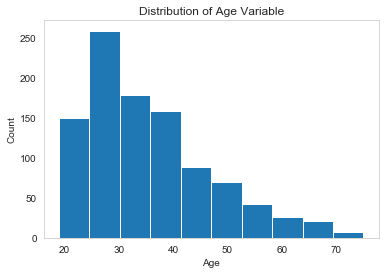

In [38]:
# Plot distribution of age variable
data['age'].hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age Variable')
plt.grid(False)

plt.show()

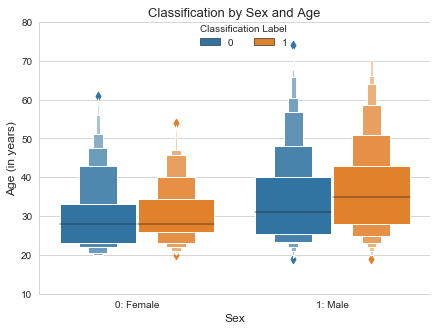

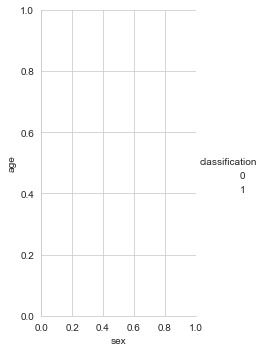

In [39]:
# Plot classification by age

# Create figure and set size
fig, ax = plt.subplots(figsize=(7,5))

sns.catplot(x='sex', y = 'age', hue = 'classification',
            data=data, kind='boxen', aspect=.6, palette='tab10', ax=ax)

# Format y-axis min, max range. Add commas and remove decimals
ax.set_ylim([10, 80])
#ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
# Format y-label
ax.set_ylabel('Age (in years)', fontsize=12)

# x-tick labels
xticklabels = ('0: Female', '1: Male')
ax.set_xticklabels(xticklabels)
# Format x-label
ax.set_xlabel('Sex', fontsize=12)

# Remove grid lines
# ax.grid(False)

# Remove borders
sns.despine(ax=ax)

# Format legend
ax.legend(bbox_to_anchor=(0.35, 1.08), loc='upper left', ncol=2, 
          frameon=False, borderaxespad=2, title = 'Classification Label')

# Add title and adjust title position
ax.set_title(
    'Classification by Sex and Age', fontsize=13)

plt.show;

- Average age of females is about the same for class 0 and class 1 labels
- Average age of males with class 1 labels is higher than class 0 labels

In [40]:
data.age.describe()

count    1000.00000
mean       35.54200
std        11.35267
min        19.00000
25%        27.00000
50%        33.00000
75%        42.00000
max        75.00000
Name: age, dtype: float64

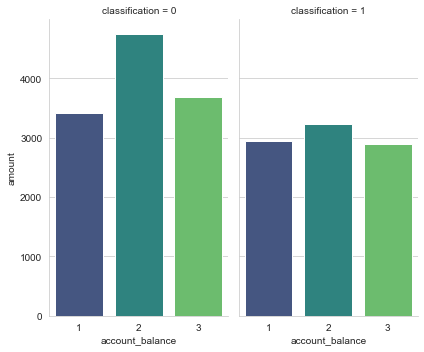

In [41]:
# Plot classification by account balance

# Create figure and set size
sns.catplot(x='account_balance', y = 'amount', col= 'classification',
                data=data, kind="bar", ci=None, aspect=.6, palette='viridis')


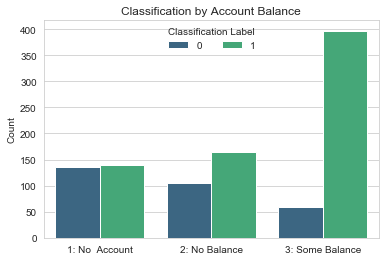

In [42]:
sns.countplot(x='account_balance', data=data, hue='classification', 
                  palette='viridis')

# Format x-label and y-label
plt.xlabel(None)
plt.ylabel('Count')
# Format x-ticks
plt.xticks([0, 1, 2], ['1: No  Account', '2: No Balance', '3: Some Balance'],
          rotation=0)
# Format legend
plt.legend(bbox_to_anchor=(0.3, 1.08), loc='upper left', ncol=2, 
          frameon=False, borderaxespad=2, title = 'Classification Label')
# Set title
plt.title('Classification by Account Balance')

plt.show()

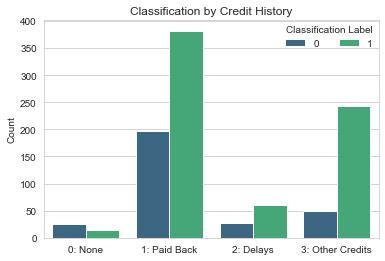

In [43]:
sns.countplot(x='credit_history', data=data, hue='classification', 
                  palette='viridis')

# Format x-label and y-label
plt.xlabel(None)
plt.ylabel('Count')
# Format x-ticks
plt.xticks([0, 1, 2, 3], ['0: None', '1: Paid Back',
                          '2: Delays', '3: Other Credits'],
          rotation=0)


# Format legend
plt.legend(bbox_to_anchor=(0.65, 1.09), loc='upper left', ncol=2, 
          frameon=False, borderaxespad=2, title = 'Classification Label')
# Set title
plt.title('Classification by Credit History')

plt.show()

## Modelling

### Set target and features

In [46]:
# Define target (y) and feature (X) variables
y = data['classification']
X = data.drop(['classification'], axis = True)

### Perform train-test split

In [47]:
# Split the data into train and test sets. The train:test ratio is 80:20, and
# random state is set to 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(800, 20) (800,)
(200, 20) (200,)


### Build column transformer for pipeline

In [48]:
# Filter for integer data types
data.dtypes[data.dtypes == 'int64']

classification    int64
duration          int64
amount            int64
age               int64
telephone         int64
foreign_worker    int64
sex               int64
dtype: object

In [49]:
# Filter for categorical data types
data.dtypes[data.dtypes == 'object']

account_balance            object
credit_history             object
purpose                    object
savings_account            object
time_current_employment    object
installment_pct            object
guarantors                 object
time_current_address       object
most_valuable_asset        object
other_credits              object
housing                    object
number_credits             object
occupation                 object
number_dependents          object
dtype: object

In [50]:
# Define lists of numeric and categorical features
numeric_features = ['duration', 'amount', 'age', 'telephone',
                   'foreign_worker', 'sex']

categorical_features = ['account_balance', 'credit_history', 'purpose',
                       'savings_account', 'time_current_employment',
                       'installment_pct', 'guarantors', 'time_current_address',
                       'most_valuable_asset', 'other_credits', 'housing',
                       'number_credits', 'occupation', 'number_dependents']

In [51]:
# Build column transformer for scaling numerical features and one-hot-encoding  
# categorical features

# Instantiate MinMaxScaler and OneHotEncoder
numeric_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Define preprocessor for numeric and categorical data
feature_preprocessor = ColumnTransformer(transformers=
                [('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)])

# Define preprocessor for numeric data only (MinMaxScaler)
numeric_preprocessor = ColumnTransformer(transformers=
                        [('num', numeric_transformer, numeric_features)])

# Define preprocessor for categorical data only (ohe)
categorical_preprocessor = ColumnTransformer(transformers=
                    [('cat', categorical_transformer, categorical_features)])

In [52]:
# Confirm that ColumnTransformer feature_preprocessor worked
# Apply feature_preprocessor to X_train set and print shape
X_train_transformed = feature_preprocessor.fit_transform(X_train)
print(X_train_transformed.shape)

# Create df and examine
X_train_transformed = pd.DataFrame(X_train_transformed)
X_train_transformed

(800, 62)


,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0.142857,0.059573,0.142857,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.035714,0.116598,0.089286,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.035714,0.070787,0.375000,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.196429,0.075374,0.107143,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.142857,0.089646,0.142857,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.089286,0.082765,0.285714,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
796,0.464286,0.182096,0.214286,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
797,0.285714,0.256260,0.089286,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
798,0.142857,0.072826,0.500000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [53]:
# Extract names of transformed variables
feature_preprocessor.fit_transform(X_train, y_train)
enc_cat_features = feature_preprocessor.named_transformers_[
                                                    'cat'].get_feature_names()
labels = np.concatenate([numeric_features, enc_cat_features])
transformed_df_columns = pd.DataFrame(feature_preprocessor.transform(X_train), columns=labels).columns
print(transformed_df_columns)

Index(['duration', 'amount', 'age', 'telephone', 'foreign_worker', 'sex',
       'x0_1', 'x0_2', 'x0_3', 'x1_0', 'x1_1', 'x1_2', 'x1_3', 'x2_0', 'x2_1',
       'x2_10', 'x2_2', 'x2_3', 'x2_4', 'x2_5', 'x2_6', 'x2_8', 'x2_9', 'x3_1',
       'x3_2', 'x3_3', 'x3_4', 'x3_5', 'x4_1', 'x4_2', 'x4_3', 'x4_4', 'x4_5',
       'x5_1', 'x5_2', 'x5_3', 'x5_4', 'x6_1', 'x6_2', 'x6_3', 'x7_1', 'x7_2',
       'x7_3', 'x7_4', 'x8_1', 'x8_2', 'x8_3', 'x8_4', 'x9_1', 'x9_2', 'x9_3',
       'x10_1', 'x10_2', 'x10_3', 'x11_1', 'x11_2', 'x12_1', 'x12_2', 'x12_3',
       'x12_4', 'x13_1', 'x13_2'],
      dtype='object')


In [54]:
# Check len of new transformed_df_columns
len(transformed_df_columns)

62

In [55]:
# Create list of column names that have been transformed
transformed_col_names = [
    'duration', 'amount', 'age', 'telephone', 
    'foreign_worker', 'sex',
    'acct_bal_1', 'acct_bal_2', 'acct_bal_3',
    'credit_hist_0', 'credit_hist_1', 'credit_hist_2', 'credit_hist_3',
    'purpose_0', 'purpose_1', 'purpose_10', 'purpose_2', 'purpose_3',
    'purpose_4', 'purpose_5', 'purpose_6', 'purpose_8', 'purpose_9', 
    'savings_acct_0', 'savings_acct_1', 'savings_acct_2', 'savings_acct_3',
    'savings_acct_4',
    'time_employment_1', 'time_employment_2', 'time_employment_3', 
    'time_employment_4', 'time_employment_5',
    'install_pct_1', 'install_pct_2', 'install_pct_3', 'install_pct_4',
    'guarantor_1', 'guarantor_2', 'guarantor_3',
    'time_address_1', 'time_address_2', 'time_address_3', 'time_address_4',
    'most_val_asset_1', 'most_val_asset_2', 'most_val_asset_3', 'most_val_asset_4',
    'other_credit_sources_1', 'other_credit_sources_2', 'other_credit_sources_3',
    'housing_1', 'housing_2', 'housing_3',
    'number_credits_1', 'number_credits_2',
    'occupation_1', 'occupation_2', 'occupation_3', 'occupation_4',
    'dependents_1', 'dependents_2'
    ]

In [56]:
# Check len of new list
len(transformed_col_names)

62

In [57]:
# Rename columns
X_train_transformed.columns = transformed_col_names
X_train_transformed

,duration,amount,age,telephone,foreign_worker,sex,acct_bal_1,acct_bal_2,acct_bal_3,credit_hist_0,...,housing_2,housing_3,number_credits_1,number_credits_2,occupation_1,occupation_2,occupation_3,occupation_4,dependents_1,dependents_2
0,0.142857,0.059573,0.142857,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.035714,0.116598,0.089286,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.035714,0.070787,0.375000,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.196429,0.075374,0.107143,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.142857,0.089646,0.142857,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.089286,0.082765,0.285714,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
796,0.464286,0.182096,0.214286,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
797,0.285714,0.256260,0.089286,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
798,0.142857,0.072826,0.500000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [58]:
# Confirm that ColumnTransformer numeric_preprocessor worked
X_train_scaled = numeric_preprocessor.fit_transform(X_train)
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5
0,0.142857,0.059573,0.142857,0.0,0.0,1.0
1,0.035714,0.116598,0.089286,0.0,0.0,0.0
2,0.035714,0.070787,0.375000,0.0,1.0,1.0
3,0.196429,0.075374,0.107143,0.0,0.0,1.0
4,0.142857,0.089646,0.142857,0.0,0.0,1.0
...,...,...,...,...,...,...
795,0.089286,0.082765,0.285714,0.0,0.0,1.0
796,0.464286,0.182096,0.214286,0.0,0.0,1.0
797,0.285714,0.256260,0.089286,0.0,0.0,1.0
798,0.142857,0.072826,0.500000,1.0,0.0,1.0


### Define function for model evaluation metrics

**Evaluation metrics**: The lender seeks to correctly i) identify bad borrowers (true negatives) in order to  
minimize losses from un-repaid loans and ii) identify good, creditworthy borrowers (true positives) in  
order to maximize profits.  

 
Given the need to minimize false positives and false negatives, the **f1-score** should be a primary evaluation  
metric. F1-score is interpreted as a harmonic mean of the precision and recall. 

Model evaluation should also focus on **precision**, since there is a need to minimize losses from false positives.

In [59]:
# Define function for model evaluation metrics
def model_evaluation(model_pipe, X_train, y_train, X_test, y_test, model_name):

    y_pred_train = model_pipe.predict(X_train)
    y_pred_test = model_pipe.predict(X_test)

# Define evaluation metric
    fscore = f1_score(y_test, y_pred_test)*100
    prec_score = precision_score(y_test, y_pred_test)*100
    
# Classification report 
    print('----------------------------------------------------------')
    print(model_name)
    print('Classification Report: Train')
    print(classification_report(y_train, y_pred_train))
    print('----------------------------------------------------------')
    print('Classification Report: Test')
    print(classification_report(y_test, y_pred_test))
    print(f'F1 Score for Test Set: {round(fscore, 2)}%')
    print(f'Precision Score for Test Set: {round(prec_score,2)}%')
        
# Plot confusion matrix
    plot_confusion_matrix(model_pipe, 
                      X_test, 
                      y_test, 
                      cmap = 'Blues',
                     display_labels= ['Not Creditworty', 'Creditworthy'],
                     values_format= '%0.2f',
                     normalize='true'
                     )
    plt.grid(False)
    plt.title(f'Normalized Confusion Matrix: {model_name}', y=1.05, fontsize = 13)
    plt.show()
    
# Print confusion matrix array
    print('Confusion Matrix array:')
    print(np.round(confusion_matrix(y_test, y_pred, normalize='true'), 2)*100)
    
# Plot precision-recall curve, which is useful measure of success of prediction  
# when classes are imbalanced. High precision relates to low FP rate, high  
# recall relates to low false negative rate.
    y_score = model_pipe.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    fig, ax = plt.subplots()
    ax.plot(recall, precision, marker='.', color='blue', label=model_name)
    #add axis labels
    ax.set_title(f'Precision-Recall Curve')
    ax.set_ylabel('Precision - Positive label: 1')
    ax.set_xlabel('Recall - Positive label: 1')
    ax.legend()
    #display plot of precision-recall curve
    plt.show()
    print ("Area Under Precision-Recall Curve(AP): %0.2f" 
           % average_precision_score(y_test, y_score))
    print('----------------------------------------------------------') 

### Build Reference Model

#### Decision stump classifier

Decision stump classifier is a binary classification algorithm. It is a simple decision tree.

In [60]:
# Define baseline Decision Stump Classifier (baseline model 1.0)
# Set random state equal to 42. Set max_depth parameter to 2.

stump_clf = DecisionTreeClassifier(random_state=42, max_depth=2)

# Build DummyClassifier model with preprocessing pipeline
stump_pipe = Pipeline(steps = [('preprocess', feature_preprocessor), 
                        ('classifier', stump_clf)])

# Fit the DummyClassifier pipeline model to training data
stump_pipe.fit(X_train, y_train)

# Predict y on test data
y_pred = stump_pipe.predict(X_test)
                             
print(f'Training Score:', np.round(stump_pipe.score(X_train, y_train),2))
print(f'Testing Score', np.round(stump_pipe.score(X_test, y_test),2))

Training Score: 0.73
Testing Score 0.73


Mean accuracy score is 73% for training and testing sets.

----------------------------------------------------------
Decision Stump Classifier
Classification Report: Train
              precision    recall  f1-score   support

           0       0.64      0.23      0.34       240
           1       0.74      0.94      0.83       560

    accuracy                           0.73       800
   macro avg       0.69      0.59      0.59       800
weighted avg       0.71      0.73      0.68       800

----------------------------------------------------------
Classification Report: Test
              precision    recall  f1-score   support

           0       0.64      0.23      0.34        60
           1       0.74      0.94      0.83       140

    accuracy                           0.73       200
   macro avg       0.69      0.59      0.59       200
weighted avg       0.71      0.73      0.68       200

F1 Score for Test Set: 83.02%
Precision Score for Test Set: 74.16%


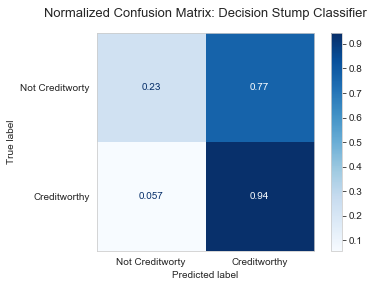

Confusion Matrix array:
[[23. 77.]
 [ 6. 94.]]


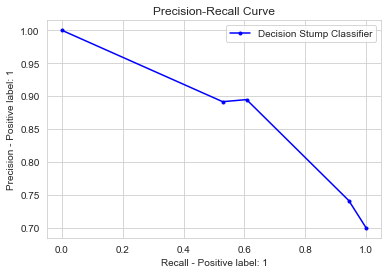

Area Under Precision-Recall Curve(AP): 0.83
----------------------------------------------------------


In [61]:
# Evaluate Decision Stump Classifier model
model_evaluation(stump_pipe, X_train, y_train, X_test, y_test, 
                 'Decision Stump Classifier')

Decision stump classifier baseline model has f1-score of 83% and precision score of 74% for  
the test set. The accuracy score is 73% for the test set--this metric is less meaningful in light  
of the target variable's class imbalance since the model is biased towards the majority class '1'.

The model predicted 94% true positives (TP) and 23% true negatives (TN).  
False positives (77%) are high for the business case where the lender wants to minimize losses.  
False negatives (0.06%) are low, but still costly.

In [ ]:
stump_pipe.named_steps['classifier'].feature_importances_

#### Dummy classifier

In [63]:
# Define baseline DummyClassifier model (version 1.1)
# Set random state to 42 for reproducibility
# Set strategy to stratified to account for class imbalance of target variable
dummy_clf = DummyClassifier(random_state = 42, strategy = 'stratified')

# Build DummyClassifier model with preprocessing pipeline
dummy_pipe = Pipeline(steps = [('preprocess', feature_preprocessor), 
                        ('classifier', dummy_clf)])

# Fit the  DummyClassifier model on training data
dummy_pipe.fit(X_train, y_train)

# Predict y
y_pred = dummy_pipe.predict(X_test)
                             
print(f'Training Score:', np.round(dummy_pipe.score(X_train, y_train),2))
print(f'Testing Score', np.round(dummy_pipe.score(X_test, y_test),2))

Training Score: 0.58
Testing Score 0.55


Mean accuracy score is 58% for training set and 55% for testing set.

----------------------------------------------------------
Dummy Classifier
Classification Report: Train
              precision    recall  f1-score   support

           0       0.29      0.29      0.29       240
           1       0.70      0.70      0.70       560

    accuracy                           0.58       800
   macro avg       0.49      0.49      0.49       800
weighted avg       0.58      0.58      0.58       800

----------------------------------------------------------
Classification Report: Test
              precision    recall  f1-score   support

           0       0.25      0.25      0.25        60
           1       0.68      0.68      0.68       140

    accuracy                           0.55       200
   macro avg       0.46      0.46      0.46       200
weighted avg       0.55      0.55      0.55       200

F1 Score for Test Set: 67.86%
Precision Score for Test Set: 67.86%


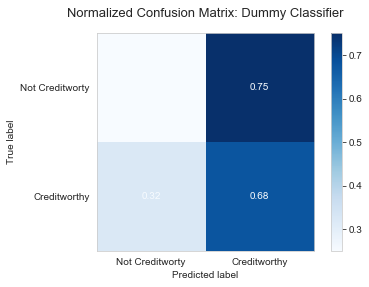

Confusion Matrix array:
[[25. 75.]
 [32. 68.]]


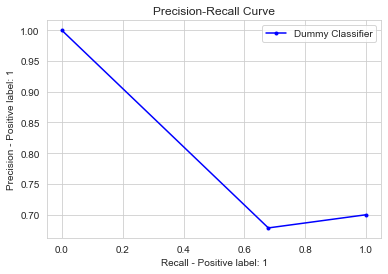

Area Under Precision-Recall Curve(AP): 0.69
----------------------------------------------------------


In [64]:
# Evaluate Dummy Classifier model
model_evaluation(dummy_clf, X_train, y_train, X_test, y_test, 
                 'Dummy Classifier')

Another option for a simple, baseline model is the Dummy classifier model, which has a  
f1-score of 68% for the test set and precision score of 68%. It predicted 68% true positives (TP)  
and just 25% true negatives (TN). False positives (75%) and false negatives (32%) are high for business case.

### Build and evaluate additional models

#### Logistic regression with balanced class weight

In [65]:
# Define logistic regression classifier with balanced class weight to add  
# weights to minority class. Set random state equal to 42, solver to liblinear.
lr_clf = LogisticRegression(fit_intercept=False,
                            random_state=42,
                            solver='liblinear',
                            class_weight='balanced',
                            max_iter=1e4)

# Build logistic regression model with preprocessing pipeline
lr_pipe = Pipeline(steps = [('preprocess', feature_preprocessor),
                     ('classifier', lr_clf)])

# Fit logistic regression model on training data
lr_pipe.fit(X_train, y_train)

# Predict y
y_pred = lr_pipe.predict(X_test)

print(f'Training Score:', np.round(lr_pipe.score(X_train, y_train),2))
print(f'Testing Score', np.round(lr_pipe.score(X_test, y_test),2))

Training Score: 0.75
Testing Score 0.72


----------------------------------------------------------
Logistic Regression with Balanced Class Weights
Classification Report: Train
              precision    recall  f1-score   support

           0       0.56      0.75      0.64       240
           1       0.87      0.75      0.81       560

    accuracy                           0.75       800
   macro avg       0.72      0.75      0.72       800
weighted avg       0.78      0.75      0.76       800

----------------------------------------------------------
Classification Report: Test
              precision    recall  f1-score   support

           0       0.52      0.77      0.62        60
           1       0.87      0.69      0.77       140

    accuracy                           0.71       200
   macro avg       0.70      0.73      0.70       200
weighted avg       0.77      0.71      0.73       200

F1 Score for Test Set: 77.29%
Precision Score for Test Set: 87.39%


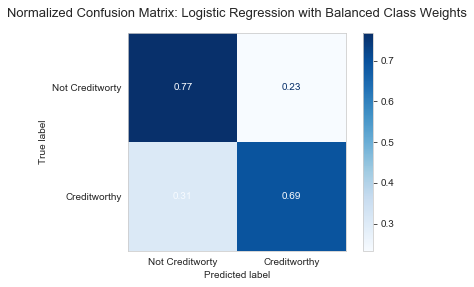

Confusion Matrix array:
[[77. 23.]
 [31. 69.]]


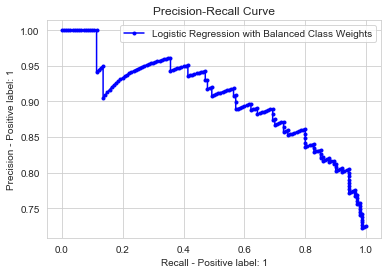

Area Under Precision-Recall Curve(AP): 0.90
----------------------------------------------------------


In [66]:
# Evaluate logistic regression model
model_evaluation(lr_pipe, X_train, y_train, X_test, y_test, 
                 'Logistic Regression with Balanced Class Weights')

Logistic regression model with balanced weights shows improvement over decision stump classifier model.  
It has overall higher accuracy. It also has higher precision (87%) for classification '1' and (52%) for  
classification '0' labels in the test set.  f1-score (77%) is the same as in stump classifier model and higher  
than in the dummy classifier model. AUC for precision-recall is 90%.

False positive rate declined compared to the stump classifier and dummy classifier models.  
Nonetheless, the logistic regression model has room for improvement since it predicts high  
percentages of false positives (23%) and false negatives (31%) for the business case.

#### Logistic regression with SMOTE-NC

SMOTE-NC (synthetic minority oversampling technique) can be applied to oversample target's  
minority class. SMOTE-NC works with continuous numeric and categorical variables.

In [67]:
# Get column index for categorical features. This serves as SMOTE-NC parameter.
cat_col_index = [data.columns.get_loc(c) for c in cat_cols if c in cat_cols]
cat_col_index

[1, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17]

In [68]:
# Instantiate SMOTE-NC
smote_nc = SMOTENC(categorical_features=cat_col_index, 
                   random_state=42, sampling_strategy='auto')

# Fit SMOTE
X_train_res, y_train_res = smote_nc.fit_resample(X_train, y_train)

# View class distributions before and after synthetic minority oversampling
print('Original class distribution: \n')
print(y_train.value_counts())
print('---------------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_res).value_counts()) 

Original class distribution: 

1    560
0    240
Name: classification, dtype: int64
---------------------------------------------
Synthetic sample class distribution: 

1    560
0    560
dtype: int64


In [69]:
# print shape of X_train, X_train_res, y_train, y_train_res shape
print(X_train.shape)
print(X_train_res.shape)
print(y_train.shape)
print(y_train_res.shape)

(800, 20)
(1120, 20)
(800,)
(1120,)


In [70]:
# Build logistic regression model with resampled training data
# Set random state equal to 42, solver to 'lbfgs'
lr_sm = LogisticRegression(fit_intercept=False,
                               random_state=42,
                               solver='lbfgs',
                               max_iter=1e4)

# Build logistic regression model with preprocessing pipeline
# Note: numeric_prepreprocessor applies MinMax scaling to numeric data;  
# categorical data is not ohe prior to applying SMOTE-NC
lr_sm_pipe = imbPipeline(steps = [
              ('sampler', smote_nc),
              ('scaler', MinMaxScaler()),
              ('classifier', lr_sm)
              ])

# Fit logistic regression model to SMOTE resampled training data
lr_sm_pipe.fit(X_train_res, y_train_res)

print(f'Training Score:', np.round(lr_sm_pipe.score(X_train_res, y_train_res),2))
print(f'Testing Score', np.round(lr_sm_pipe.score(X_test, y_test),2))

Training Score: 0.75
Testing Score 0.7


----------------------------------------------------------
Logistic Regression with SMOTE-NC
Classification Report: Train
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       560
           1       0.74      0.78      0.76       560

    accuracy                           0.75      1120
   macro avg       0.75      0.75      0.75      1120
weighted avg       0.75      0.75      0.75      1120

----------------------------------------------------------
Classification Report: Test
              precision    recall  f1-score   support

           0       0.51      0.63      0.56        60
           1       0.82      0.74      0.78       140

    accuracy                           0.70       200
   macro avg       0.67      0.68      0.67       200
weighted avg       0.73      0.70      0.71       200

F1 Score for Test Set: 77.74%
Precision Score for Test Set: 82.4%


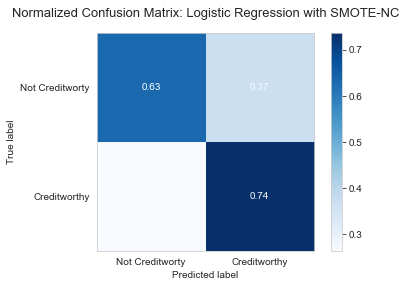

Confusion Matrix array:
[[63. 37.]
 [26. 74.]]


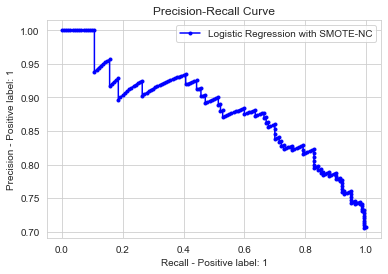

Area Under Precision-Recall Curve(AP): 0.88
----------------------------------------------------------


In [71]:
# Predict y
y_pred = lr_sm_pipe.predict(X_test)

# Evaluate logistic regression model
model_evaluation(lr_sm_pipe, X_train_res, y_train_res, X_test, y_test, 
                 'Logistic Regression with SMOTE-NC')

The logistic regression with SMOTE-NC model has higher F1 score (82%)  
and lower precision score (78%) compared to the logistic regression with balanced  
class weights. AUC for precision-recall is also slightly lower at 88%.

False positives (37%) are higher, while false negatives (26%) are lower.

#### Decision tree classifier with balanced class weight

In [72]:
# Build decision tree classifier with greater max_depth than decision stump classifier
# Set random state equal to 42 for reproducibility and class weight to balanced
dt_clf = DecisionTreeClassifier(random_state=42, class_weight = 'balanced')

# Create pipeline for Decision Tree Classifier
dt_pipe = Pipeline([('preprocessor', feature_preprocessor), 
                   ('dt', dt_clf)])

# Define model hyperparameters for GridSearch in a dictionary                            
dt_param_grid = {
     'dt__criterion': ['entropy','gini'],
     'dt__splitter': ['best', 'random'],
     'dt__max_depth': [3,4,5,6,7,8,9,10],
     'dt__min_samples_leaf': [1, 2, 3, 4, 5]
      }

# Instantiate GridSearchCV
dt_gs = GridSearchCV(dt_pipe, dt_param_grid,
                     cv=10,
                     n_jobs=-1,
                     return_train_score=True
                    )

# Fit model to training data    
dt_gs.fit(X_train,y_train)

print(f'Training Score:', np.round(dt_gs.score(X_train, y_train),2))
print(f'Testing Score:', np.round(dt_gs.score(X_test, y_test),2))

Training Score: 0.75
Testing Score: 0.68


In [73]:
# Select best parameters for Decision Tree
dt_gs.best_params_

{'dt__criterion': 'entropy',
 'dt__max_depth': 6,
 'dt__min_samples_leaf': 5,
 'dt__splitter': 'random'}

----------------------------------------------------------
Decision Tree
Classification Report: Train
              precision    recall  f1-score   support

           0       0.56      0.85      0.67       240
           1       0.92      0.71      0.80       560

    accuracy                           0.75       800
   macro avg       0.74      0.78      0.74       800
weighted avg       0.81      0.75      0.76       800

----------------------------------------------------------
Classification Report: Test
              precision    recall  f1-score   support

           0       0.48      0.70      0.57        60
           1       0.84      0.68      0.75       140

    accuracy                           0.69       200
   macro avg       0.66      0.69      0.66       200
weighted avg       0.73      0.69      0.70       200

F1 Score for Test Set: 75.1%
Precision Score for Test Set: 84.07%


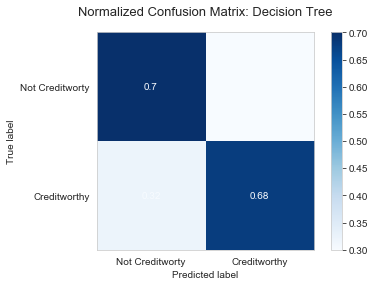

Confusion Matrix array:
[[70. 30.]
 [32. 68.]]


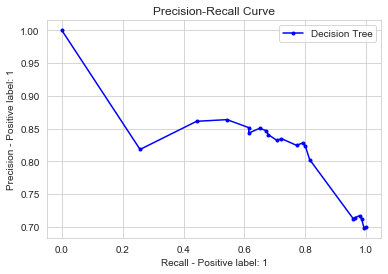

Area Under Precision-Recall Curve(AP): 0.82
----------------------------------------------------------


In [74]:
# predict y
y_pred = dt_gs.best_estimator_.predict(X_test)

# Evaluate model
model_evaluation(dt_gs.best_estimator_, X_train, y_train, X_test, y_test, 
                 'Decision Tree')

In the decision tree classifier model, f1 score (75%) and precision score (84%) are a bit lower than the logistic  
regression with balanced class weights model. AUC for precision-recall is also lower at 82%.

TP (68%) are lower than in logistic regression with SMOTE-NC and same as logistic regression with balanced  
class weights models. FP (34%) are lower than logistic regression with SMOTE-NC and slightly higher than with  
logistic regression with balanced class weight.


#### Random Forest with balanced class weight

In [75]:
# Instantiate Random Forest classifier model
# Set random_state to 42 and class_weight to balanced.
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Create pipeline
rf_pipe = Pipeline(steps = [('preprocessor', feature_preprocessor), 
                   ('rf', rf_clf)])

# Define hyperparameters for GridSearch in a dictionary 
rf_param_grid = {
    'rf__criterion':['gini','entropy'],
     'rf__max_depth': [3,4,5,6,7],
     'rf__max_features': ['auto', 'sqrt'],
     'rf__min_samples_leaf': [1, 2, 3, 4, 5],
     'rf__min_samples_split': [2,4,6,8],
     }

# Instantiate GridSearchCV
rf_gs = GridSearchCV(rf_pipe, rf_param_grid,
                     cv=10,
                     n_jobs=-1,
                     return_train_score=True
                    )

# Fit the Random Forest classifier model to training data
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         MinMaxScaler(copy=True,
                                                                                      feature_range=(0,
                                                                                                     1)),
                                                                         ['duration',
                                                                          'amo

In [76]:
print(f'Training Score:', np.round(rf_gs.score(X_train, y_train),2))
print(f'Testing Score', np.round(rf_gs.score(X_test, y_test),2))

Training Score: 0.87
Testing Score 0.76


In [77]:
rf_gs.best_params_

{'rf__criterion': 'gini',
 'rf__max_depth': 7,
 'rf__max_features': 'auto',
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 4}

----------------------------------------------------------
Random Forest Classifier
Classification Report: Train
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       240
           1       0.93      0.88      0.91       560

    accuracy                           0.87       800
   macro avg       0.84      0.87      0.85       800
weighted avg       0.88      0.87      0.87       800

----------------------------------------------------------
Classification Report: Test
              precision    recall  f1-score   support

           0       0.60      0.67      0.63        60
           1       0.85      0.81      0.83       140

    accuracy                           0.77       200
   macro avg       0.72      0.74      0.73       200
weighted avg       0.77      0.77      0.77       200

F1 Score for Test Set: 82.78%
Precision Score for Test Set: 84.96%


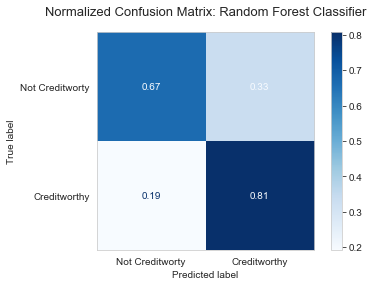

Confusion Matrix array:
[[67. 33.]
 [19. 81.]]


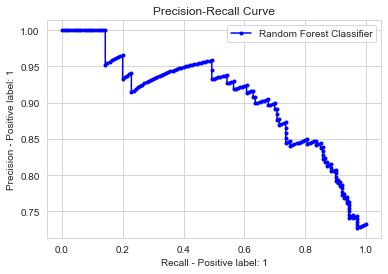

Area Under Precision-Recall Curve(AP): 0.91
----------------------------------------------------------


In [78]:
# Estimate y_pred
y_pred = rf_gs.best_estimator_.predict(X_test)

# Evaluate model performance
model_evaluation(rf_gs.best_estimator_, X_train, y_train, X_test, y_test, 
                 'Random Forest Classifier')

In the random forest model, the f1-score is 83%, which is higher than other models. Precision score (85%)  
is higher than in the logistic regression with SMOTE and lower than the logistic regression with balanced  
class weights model. AUC for precision-recall is 91%, which is slightly higher than the logistic regression  
with balanced class weights.

TP are 81%, while TN are 67%. FP (33%) and FN (19%) are lower than the other models.

Model may be overfitting (87% mean accuracy score for training set vs 76% for testing set).

#### Gradient Boosting Classifier with SMOTE-NC

In [79]:
#Instantiate GradientBoosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42, learning_rate = 0.005)

#Define pipeline
gb_pipe = imbPipeline(steps = [
                     ('sampler', smote_nc),
                     ('scaler', MinMaxScaler()), 
                     ('gb', gb_clf)])

# Define hyperparameters for GridSearch in a dictionary 
gb_param_grid = {
     'gb__max_depth': [4,5,6,7,8],
     'gb__min_samples_leaf': [2, 3, 4, 5],
     'gb__min_samples_split': [2,4,6,8],
     }

# Instantiate GridSearchCV
gb_gs = GridSearchCV(gb_pipe, gb_param_grid,
                     cv=10,
                     n_jobs=-1,
                     return_train_score=True
                    )

# Fit GradientBoosting Model to SMOTE resampled training data
gb_gs.fit(X_train_res, y_train_res)

# Predict y on testing data
y_pred = gb_gs.predict(X_test)

print(f'Training Score:', np.round(gb_gs.score(X_train_res, y_train_res),2))
print(f'Testing Score', np.round(gb_gs.score(X_test, y_test),2))

Training Score: 0.89
Testing Score 0.72


In [80]:
gb_gs.best_params_

{'gb__max_depth': 7, 'gb__min_samples_leaf': 3, 'gb__min_samples_split': 8}

----------------------------------------------------------
Gradient Boosting
Classification Report: Train
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       560
           1       0.93      0.84      0.88       560

    accuracy                           0.89      1120
   macro avg       0.89      0.89      0.89      1120
weighted avg       0.89      0.89      0.89      1120

----------------------------------------------------------
Classification Report: Test
              precision    recall  f1-score   support

           0       0.53      0.67      0.59        60
           1       0.84      0.74      0.79       140

    accuracy                           0.72       200
   macro avg       0.68      0.70      0.69       200
weighted avg       0.74      0.72      0.73       200

F1 Score for Test Set: 78.79%
Precision Score for Test Set: 83.87%


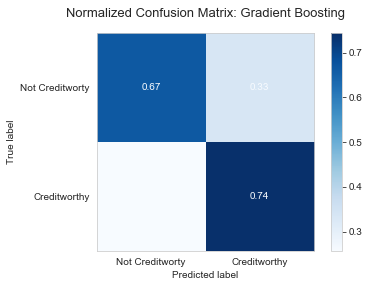

Confusion Matrix array:
[[67. 33.]
 [26. 74.]]


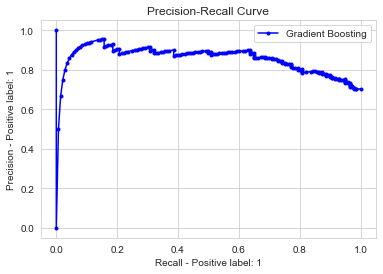

Area Under Precision-Recall Curve(AP): 0.86
----------------------------------------------------------


In [81]:
# Evaluate model performance
model_evaluation(gb_gs, X_train_res, y_train_res, X_test, y_test,
                 'Gradient Boosting')

Gradient boosting classifier with SMOTE model has lower f1-score (79%)  
compared to the other models. Precision score is 84%, similar to most other models  
but lower than the random forest model. 
TP are 74%, and TN are 67%. FP are 33%, and FN are 26%.

Model may be overfitting (89% mean accuracy score for training set vs 72% for testing set).

#### XGBoost Classifier with SMOTE-NC

In [82]:
# Instantiate XGBoost model
xgb_clf = XGBClassifier(random_state=42, learning_rate = 0.005)

# Build pipeline
xgb_pipe = imbPipeline(steps = [
                    ('sampler', smote_nc),
                    ('scaler', MinMaxScaler()),
                    ('xgb', xgb_clf)
                    ])

# Defining hyperparameters for GridSearch in a dictionary 
xgb_param_grid = {
     'xgb__max_depth': [4,5,6,7,8],
     'xgb__min_samples_leaf': [2, 3, 4, 5],
     'xgb__min_samples_split': [2,4,6,8],
     }

# Instantiate GridSearchCV
xgb_gs = GridSearchCV(xgb_pipe, xgb_param_grid,
                     cv=10,
                     n_jobs=-1,
                     return_train_score=True
                     )

# Fit model to scaled numeric, SMOTE-resampled data
xgb_gs.fit(X_train_res, y_train_res)

# Predict y on testing data
y_pred = xgb_gs.predict(X_test)

print(f'Training Score:', np.round(xgb_gs.score(X_train_res, y_train_res),2))
print(f'Testing Score:', np.round(xgb_gs.score(X_test, y_test),2))

Training Score: 0.89
Testing Score: 0.76


In [83]:
xgb_gs.best_params_

{'xgb__max_depth': 8, 'xgb__min_samples_leaf': 2, 'xgb__min_samples_split': 2}

----------------------------------------------------------
XGradient Boosting
Classification Report: Train
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       560
           1       0.92      0.86      0.89       560

    accuracy                           0.89      1120
   macro avg       0.90      0.89      0.89      1120
weighted avg       0.90      0.89      0.89      1120

----------------------------------------------------------
Classification Report: Test
              precision    recall  f1-score   support

           0       0.58      0.70      0.63        60
           1       0.86      0.78      0.82       140

    accuracy                           0.76       200
   macro avg       0.72      0.74      0.72       200
weighted avg       0.77      0.76      0.76       200

F1 Score for Test Set: 81.65%
Precision Score for Test Set: 85.83%


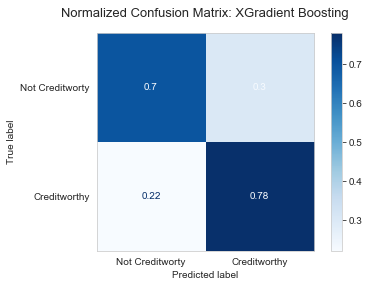

Confusion Matrix array:
[[70. 30.]
 [22. 78.]]


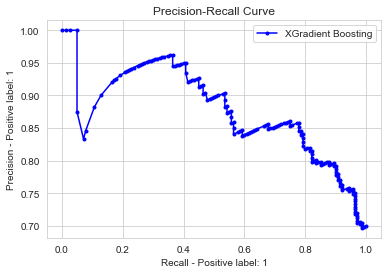

Area Under Precision-Recall Curve(AP): 0.88
----------------------------------------------------------


In [84]:
# Evaluate model performance
model_evaluation(xgb_gs, X_train_res, y_train_res, X_test, y_test,
                 'XGradient Boosting')

XGBoost Classifier with SMOTE-NC produces f1-score of 82% and a precision score of  
86%. AUC for precision-recall is 88%, among the higher scores compared to other models.  
False positives are 30%, and false negatives are 22%, generally lower compared to  
other models.

Model may be overfitting (89% mean accuracy score for training set vs 76% for testing set).

#### RUSBoost Classifier

RUSBoost Classifier is a method of addressing class imbalances by random under-sampling  the sample at  
each iteration of the boosting algorithm.

In [85]:
# Define classifier
rusb_clf = RUSBoostClassifier(
        sampling_strategy='auto',
        learning_rate = 0.0005,
        random_state=42,
    )

rusb_pipe = Pipeline(steps=[('preprocess', feature_preprocessor), 
                            ('rusb', rusb_clf),
                              ])

# Define hyperparameters for GridSearch in a dictionary 
rusb_params_grid = {
    'rusb__n_estimators':[10,25,50,60],
}

# Instantiate GridSearchCV
rusb_gs = GridSearchCV(rusb_pipe, rusb_params_grid,
                     cv=10,
                     n_jobs=-1,
                     return_train_score=True
                     )

# Fit model to scaled numeric, SMOTE-resampled data
rusb_gs.fit(X_train, y_train)

# Predict y on testing data
y_pred = rusb_gs.predict(X_test)

print(f'Training Score:', np.round(rusb_gs.score(X_train, y_train),2))
print(f'Testing Score:', np.round(rusb_gs.score(X_test, y_test),2))

Training Score: 0.98
Testing Score: 0.72


In [86]:
rusb_gs.best_params_

{'rusb__n_estimators': 60}

----------------------------------------------------------
RUS Boosting
Classification Report: Train
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       240
           1       1.00      0.97      0.98       560

    accuracy                           0.98       800
   macro avg       0.96      0.98      0.97       800
weighted avg       0.98      0.98      0.98       800

----------------------------------------------------------
Classification Report: Test
              precision    recall  f1-score   support

           0       0.52      0.78      0.63        60
           1       0.88      0.69      0.78       140

    accuracy                           0.72       200
   macro avg       0.70      0.74      0.70       200
weighted avg       0.77      0.72      0.73       200

F1 Score for Test Set: 77.6%
Precision Score for Test Set: 88.18%


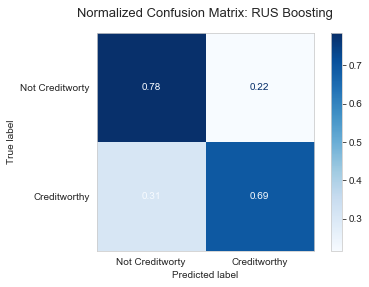

Confusion Matrix array:
[[78. 22.]
 [31. 69.]]


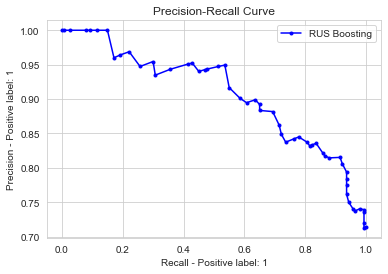

Area Under Precision-Recall Curve(AP): 0.91
----------------------------------------------------------


In [87]:
# Evaluate model performance
model_evaluation(rusb_gs, X_train, y_train, X_test, y_test,
                 'RUS Boosting')

RUSBoost Classifier produces f1-score of 77% and a precision score of 88%.  
AUC for precision-recall is 91%, among the higher scores compared to other models.  
False positives are 22%, and false negatives are 31%.

Model may be overfitting (98% mean accuracy score for training set vs 72% for testing set).

## Choose and evaluate final model

### Model selection

Model selection: Random forest with balanced class weights returned high 
f1-score (81%) and  
precision (845), and average area under precision-recall curve is high at 87%.  
As noted above, the model may be overfitting; therefore, next iterations should aim to reduce overfitting.

In [88]:
# Extract important features
feature_importance_df = pd.DataFrame(rf_gs.best_estimator_.named_steps[
                                        'rf'].feature_importances_, 
                                         index=X_train_transformed.columns)

feature_importance_df.columns = ['importance']
feature_importance_df.sort_values(by=['importance'], ascending=False).head(60)

,importance
acct_bal_3,0.128477
amount,0.080377
duration,0.072620
acct_bal_1,0.063196
age,0.060064
savings_acct_0,0.035518
credit_hist_3,0.030489
savings_acct_4,0.023623
purpose_1,0.019943
acct_bal_2,0.017255


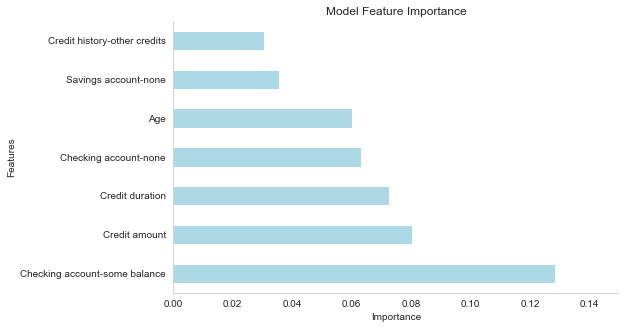

In [110]:
# Plot top features by feature importance

# Create figure and set size
fig, ax = plt.subplots(figsize=(8,5))

feature_importance_df.sort_values(by=['importance'],
                                 ascending=False).head(7).plot(
                                                        kind='barh', 
                                                        color = 'lightblue',
                                                        ax=ax)
# Set x-label and y-label
ax.set_xlabel('Importance')
ax.set_ylabel('Features')


# Format x-axis min, max range. Add commas and remove decimals
ax.set_xlim([0, 0.15])
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))

# Format y-tick labels
top_features_labels = ['Checking account-some balance', 'Credit amount', 
                       'Credit duration', 'Checking account-none', 'Age', 
                       'Savings account-none',
                       'Credit history-other credits']
ax.set_yticklabels(top_features_labels, rotation=0)

# Set title
ax.set_title('Model Feature Importance')

# Remove legend
ax.get_legend().remove()

# Remove grid line
plt.grid(False)

# Remove top border and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display plot
plt.show()

- Top features by importance are related to a borrower's account balance, duration  
of credit, amount of credit, borrower's age, savings account, and credit history.

## Conclusion and Recommendations

The selected model finds that the following features are most important determinants of creditworthy borrowers.

Account balances: Creditworthy borrowers have some balances in their bank account, and the model suggests  
that borrowers without accounts are also more likely to be creditworthy compared to borrowers with zero balance  
in their account.

Amount: Creditworthy borrowers have lower credit balances, by around 30% on average, compared to  
non-creditworthy borrowers. Average initial balance of creditworthy borrowers is nearly 3,000  local current units.


Duration: Creditworthy borrowers have credits with shorter duration compared to non-creditworthy borrowers.  
Average duration for loans held by creditworthy borrowers is 19 months, compared to 25 months for  
non-creditworthy borrowers.

Age: Creditworthy borrowers are older (36 years old) than non-creditworthy borrowers (34 years old)  
on average, according to the model. In particular, the average age of creditworth males is higher  
than non-creditworthy males. Average age of creditworthy and non-creditworthy females is about the same. 

Savings account: Creditworthy borrowers do not need to have savings account balances.

Credit history: Creditworthy borrowers have other existing credits.

In [90]:
data.groupby('classification')['amount','duration', 'age'].mean()

,amount,duration,age
classification,,,
0,3938.126667,24.860000,33.96
1,2985.442857,19.207143,36.22


### Types of bias

Sample bias:
Sex -- the dataset includes information about a borrower's sex that may not be valid input  
since women are underrepresented in the data. The models are trained on more male data and,  
thus, could have bias towards male borrowers.

Measurement bias:
Age -- age data provided as input (for training) may differ from age data collected going  
forward once model is used for the business application.

### Recommendations

This modeling provides an assessment of borrowers' creditworthiness. It has not yet been compared to  
results generated through traditional credit-risk assessment. Next steps should evaluate the model's  
performance against the bank's existing credit-risk assessment tools and processes. Furthermore,  
to reduce sample and measurement bias, variables age and sex should be excluded from the model.